# 6.1 Normal Distributions


Normal distributions are perfectly symmetric, bell-shaped curves. These distributions can be totally descibed with only two values: the mean ($\mu$) and the standard deviation ($\sigma$).  


The most common application of normal distributions in education is when it comes to *standardized tests*. The SAT, ACT, AP exams, and MCAS tests are all examples of standardized tests. Standardizing tests is a way to keep the mean and standard deviation consistent year to year and also allows for a way to compare performance between students who took different tests. 

Note: We are all part of the era when standardized testing became the big thing in education. There are pros and cons to it. It can be an interesting and controversial aspect of our education system. A basic awareness of the math behind it can be super important.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

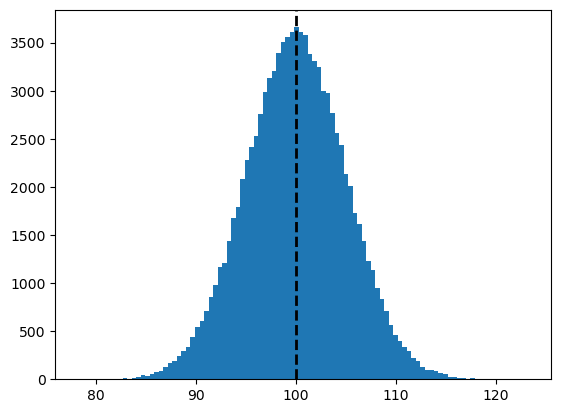

In [2]:
# Mean of the distribution 
mean = 100
 
# satndard deviation of the distribution
standard_deviation  = 5
  
# size
size = 100000
  
# creating a normal distribution data
values = np.random.normal(mean, standard_deviation, size)
  
# plotting histograph
plt.hist(values, 100)
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()

## 

## Identifying the Mean $\mu$

For a normal distribution, the mean can be identified as the point where the curve is at it's highest peak.

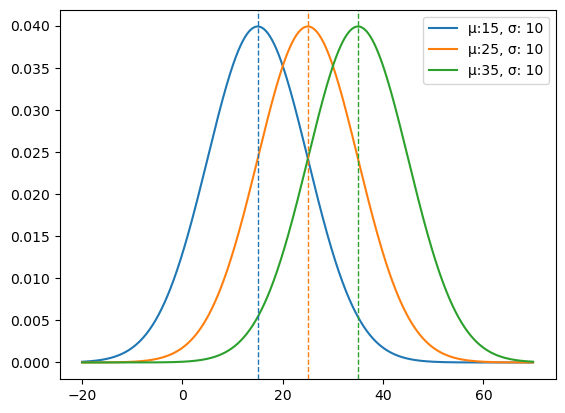

In [3]:
x = np.arange(-20, 70, 0.1)

sigma = 10

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 15, sigma), label='μ:15, σ: 10')
plt.plot(x, norm.pdf(x, 25, sigma), label='μ:25, σ: 10')
plt.plot(x, norm.pdf(x, 35, sigma), label='μ:35, σ: 10')

plt.axvline(15, color='tab:blue', linestyle='dashed', linewidth=1)
plt.axvline(25, color='tab:orange', linestyle='dashed', linewidth=1)
plt.axvline(35, color='tab:green', linestyle='dashed', linewidth=1)

plt.legend()

## Identifying the Standard Deviation $\sigma$
The standard deviation can be trickier to spot. This is the point where the curve changes from turning upwards to turning downwards. This is also referred to as an **inflection point**. 

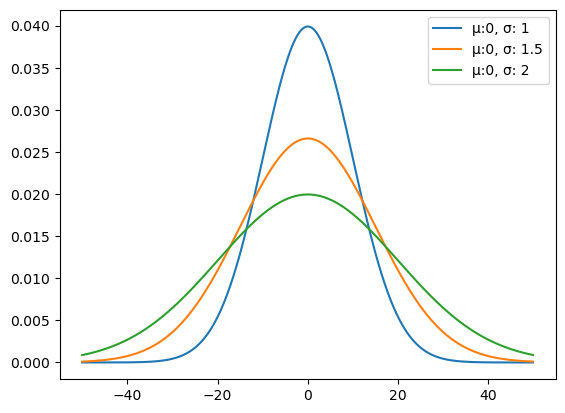

In [4]:
x = np.arange(-50, 50, 0.1)

mu = 0

#define multiple normal distributions
plt.plot(x, norm.pdf(x, mu, 10), label='μ:0, σ: 1')
plt.plot(x, norm.pdf(x, mu, 15), label='μ:0, σ: 1.5')
plt.plot(x, norm.pdf(x, mu, 20), label='μ:0, σ: 2')

plt.legend()


## The 68-95-99.7 Rule

If a dataset is perfectly normally distributed, then 
* approximately 68% of the data values will fall within one standard deviation of the mean
* Approximately 95% of a normally distributed dataset will fall within 2 standard deviations of the mean.
* Approximately 99.7% of normally distributed data fall within 3 standard deviations of the mean.

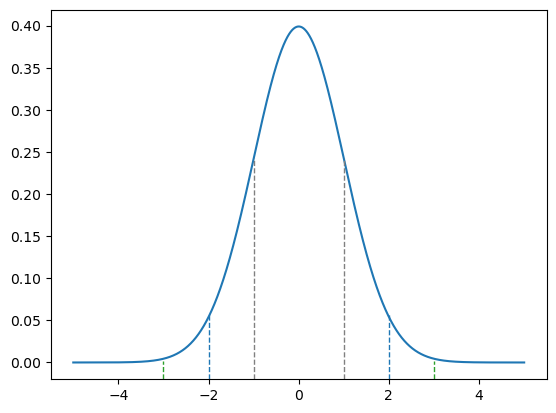

In [5]:
x = np.arange(-5, 5, 0.001)

mu = 0
sigma = 1

# plot normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), label='μ:15, σ: 10')
# plot vertical lines
plt.axvline(1, ymax=0.6, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(-1, ymax=0.6, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(2, ymax=0.18, color='tab:blue', linestyle='dashed', linewidth=1)
plt.axvline(-2, ymax=0.18, color='tab:blue', linestyle='dashed', linewidth=1)
plt.axvline(3, ymax=0.05, color='tab:green', linestyle='dashed', linewidth=1)
plt.axvline(-3, ymax=0.05, color='tab:green', linestyle='dashed', linewidth=1)

## Standardized Scores

Applying the 68-95-99.7 Rule, we must first figure out how many standard deviations above or below the mean our data fall. This is known as the **standardized score**. 

Values above the mean have positive standardized scores, while those below the mean have negative standardized scores. We use $z$ to represent a standard score, this value is also often referred to as a $z$-score.

> **$z$-score**
> If $x$ is a member of a normally distributed dataset with mean $\mu$ and standard deviation $\sigma$, then the standardized score for $x$ is
$$ z = \frac{x - \mu}{\sigma}$$

 
To get the original value $x$ from the $z$-score we solve the above equation for $x$
$$ x = \mu + z \cdot \sigma $$

In [6]:
def zscore(x, mu, sigma):
    z = (x - mu) / sigma
    return z

def xvalue(z, mu, sigma):
    x = mu + z * sigma
    return x

Let's test it on some values

In [7]:
mu = 50
sigma = 6

zscore(52, mu, sigma)

0.3333333333333333

In [8]:
zscore(40, mu, sigma)

-1.6666666666666667

In [9]:
zscore(68, mu, sigma)

3.0

Now let's test our function to see if we get back the correct x value

In [10]:
xvalue(1.4, mu, sigma)

58.4

In [11]:
xvalue(-0.9, mu, sigma)

44.6

In [12]:
xvalue(3.5, mu, sigma)

71.0

### How can we find the percentile with a given z-score?

According to the Digest of Education Statistics, composite scores on the SAT have mean 1060 and standard deviation 195, while composite scores on the ACT have mean 21 and standard deviation 5.

At what percentile would an SAT score of 990 fall?

In [13]:
sat_mu = 1060
sat_sigma = 195

norm.cdf(990, sat_mu, sat_sigma )

0.35980713557990285

What is the percentile of an ACT score of 27?

In [14]:
act_mu = 21
act_sigma = 5

norm.cdf(27, act_mu, act_sigma)

0.8849303297782918

Which is better: a score of 1450 on the SAT or 29 on the ACT?

In [15]:
sat_x = 1450

norm.cdf(sat_x, sat_mu, sat_sigma)

0.9772498680518208

In [16]:
act_x = 29

norm.cdf(act_x, act_mu, act_sigma)

0.945200708300442

Using $z$-scores

In [18]:
zscore(act_x, act_mu, act_sigma)

1.6

In [19]:
zscore(sat_x, sat_mu, sat_sigma)

2.0

In [20]:
norm.ppf(0.90)

1.2815515655446004

In [21]:
norm.ppf(0.90, loc=78, scale=8)

88.2524125243568